In [61]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")

def graph_sentiment_trends(file, title):
    df = pd.read_csv(file)
    df = df.sort_values(by='year_quarter')
    # df = df.dropna()

    fig, ax = plt.subplots()

    # make it robust to missing values, so they don't get skipped on the x axis
    xvals = range(len(df))
    # df['year_quarter']

    for sentiment in ['positive', 'neutral', 'negative']:
        yvals = df[sentiment]
        ax.plot(xvals, yvals, label=sentiment, marker='o')

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Sentiment Level")
    ax.set_title(title, font=fpath)
    ax.legend()
    # replace the scalar values with the quarter name
    plt.xticks(xvals, list(df['year_quarter']))
    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"/Users/calebharding/Documents/BYU/2023-2024/China_Project/reports/visuals/sentiment/{title}.png", bbox_inches="tight")
    plt.show()

def graph_asx_vs_qs_sentiment_trends(qs_file, asx_file, title):
    # read in the files, make sure they are in chronological order
    qs = pd.read_csv(qs_file)
    qs = qs.sort_values(by='year_quarter')

    asx = pd.read_csv(asx_file)
    asx = asx.sort_values(by='year_quarter')

    # create the plot 
    fig, ax = plt.subplots()

    # get the list of x values
    xvals = qs['year_quarter']

    mag_sentiments = [qs, asx]

    # plot the sentiments
    for index, mag_sent in enumerate(mag_sentiments):
        for sentiment in ['positive', 'neutral', 'negative']:
            yvals = mag_sent[sentiment]
            if index == 0:
                label = sentiment + " (QS)"
            else: 
                label =  sentiment + " (ASX)"

            ax.plot(xvals, yvals, label=label, marker='o')

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Sentiment Level")
    ax.set_title(title, font=fpath)
    ax.legend()
    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"/Users/calebharding/Documents/BYU/2023-2024/China_Project/reports/visuals/sentiment/{title}.png", bbox_inches="tight")
    plt.show()



## Economy

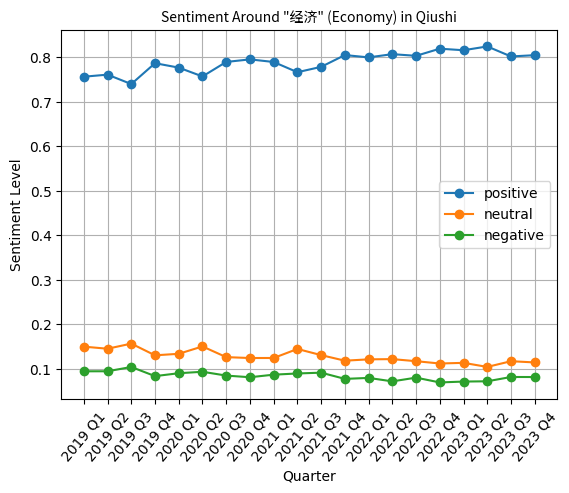

In [63]:
graph_sentiment_trends("./aggregated_sentiments/QS_经济.csv", "Sentiment Around \"经济\" (Economy) in Qiushi")

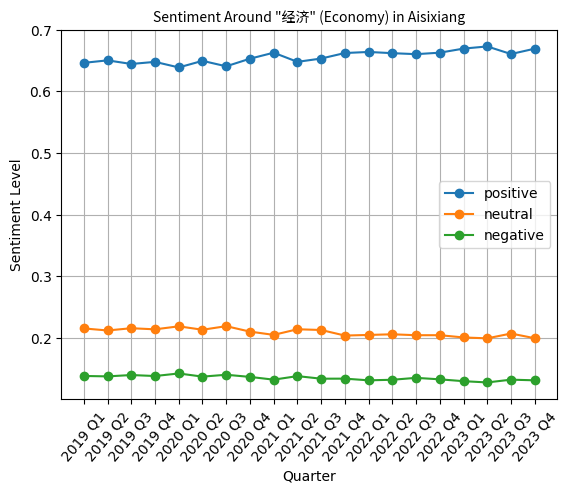

In [64]:
graph_sentiment_trends("./aggregated_sentiments/ASX_经济.csv", "Sentiment Around \"经济\" (Economy) in Aisixiang")

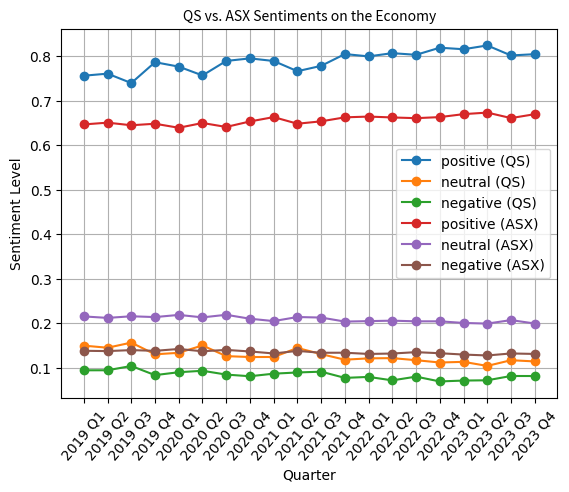

In [65]:
graph_asx_vs_qs_sentiment_trends("./aggregated_sentiments/QS_经济.csv", "./aggregated_sentiments/ASX_经济.csv", "QS vs. ASX Sentiments on the Economy")

## BRI vs. GIs

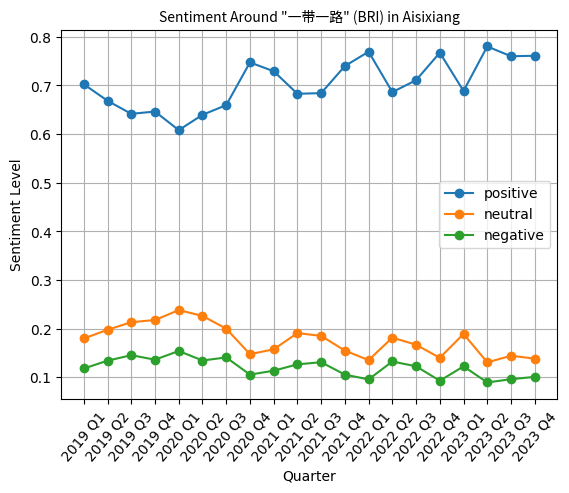

In [66]:
graph_sentiment_trends("./aggregated_sentiments/ASX_一带一路.csv", "Sentiment Around \"一带一路\" (BRI) in Aisixiang")

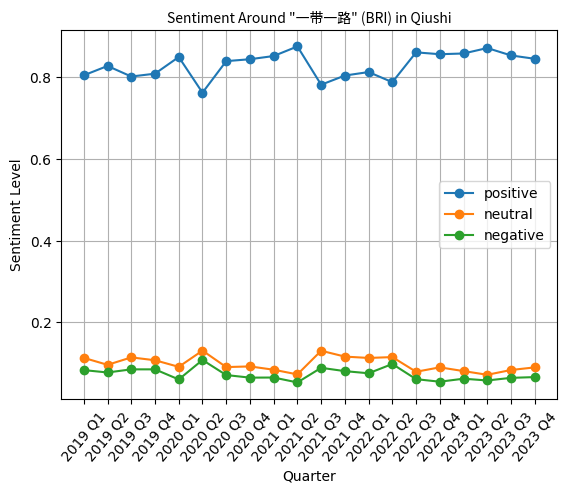

In [67]:
graph_sentiment_trends("./aggregated_sentiments/QS_一带一路.csv", "Sentiment Around \"一带一路\" (BRI) in Qiushi")

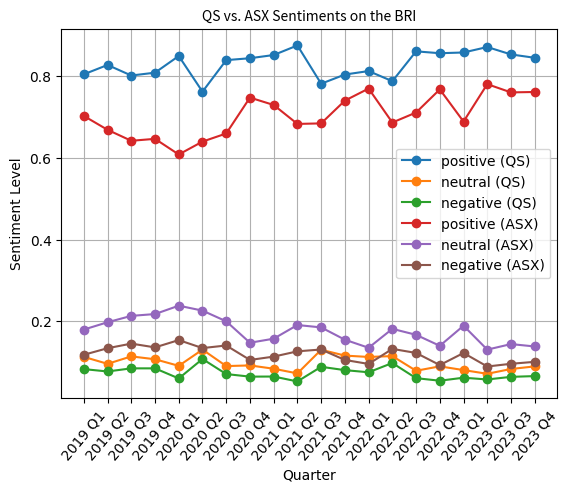

In [68]:
graph_asx_vs_qs_sentiment_trends("./aggregated_sentiments/QS_一带一路.csv", "./aggregated_sentiments/ASX_一带一路.csv", "QS vs. ASX Sentiments on the BRI")

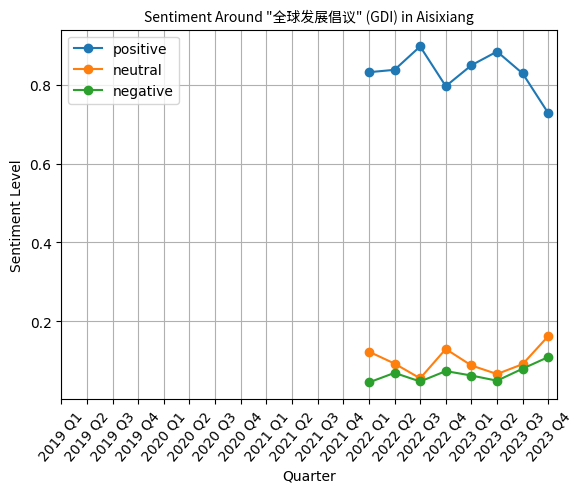

In [69]:
graph_sentiment_trends("./aggregated_sentiments/ASX_全球发展倡议.csv", "Sentiment Around \"全球发展倡议\" (GDI) in Aisixiang")

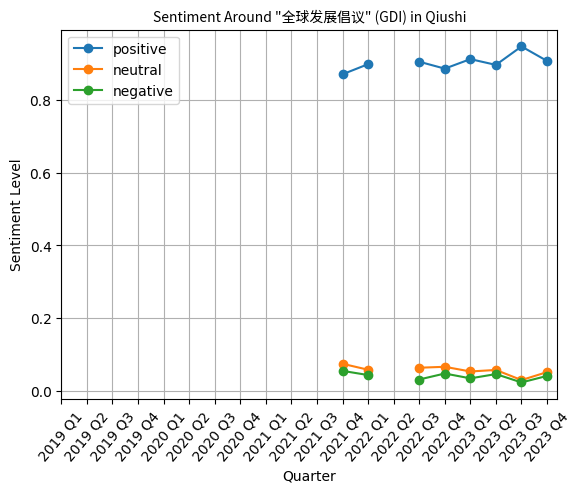

In [70]:
graph_sentiment_trends("./aggregated_sentiments/QS_全球发展倡议.csv", "Sentiment Around \"全球发展倡议\" (GDI) in Qiushi")

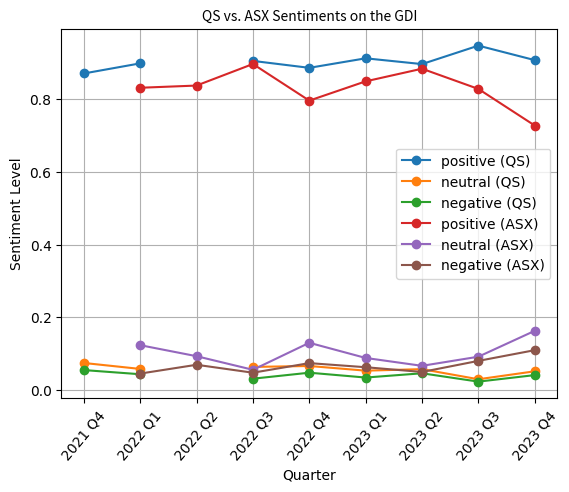

In [72]:
graph_asx_vs_qs_sentiment_trends("./aggregated_sentiments/QS_全球发展倡议.csv", "./aggregated_sentiments/ASX_全球发展倡议.csv", "QS vs. ASX Sentiments on the GDI")